In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth
import os
from dotenv import load_dotenv
from datetime import datetime, date

import pandas as pd
import numpy as np

import plotnine
from plotnine import ggplot, aes

In [2]:
load_dotenv()
cid = os.environ.get("SPOTIFY_API_USER")
secret = os.environ.get("SPOTIFY_API_KEY")

In [3]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
      client_id= cid,
      client_secret= secret,
      redirect_uri="https://rgalindor.github.io",
      scope="user-read-recently-played"))

In [4]:
resultados = sp.current_user_recently_played(limit=50, before=date.today())
track_uris = [x["track"]["uri"] for x in resultados["items"]]
#track_uris

In [5]:
df = pd.DataFrame(
    [
        track["track"]["uri"],
        track["track"]["name"],
        track["track"]["artists"][0]["uri"],
        sp.artist(track["track"]["artists"][0]["uri"]),
        track["track"]["artists"][0]["name"],
        track["track"]["album"]["name"],
        track["track"]["popularity"],
        sp.audio_features(track["track"]["uri"])]
    for track in resultados["items"]
)
df.columns = ["track_uri","track_name","artist_uri","artist_info","artist_name","album_name","popularity","audio_features"]

In [ ]:
pd2 = pd
#pd = pd2

In [6]:

artists = pd.json_normalize(df["artist_info"])
tracks_features = pd.json_normalize(pd.json_normalize(df["audio_features"])[0])

In [7]:
df = df.join(artists, lsuffix="_track", rsuffix="_artist")
df = df.join(tracks_features, lsuffix="_left", rsuffix="_features")

In [8]:
song_metrics = df.select_dtypes(np.number)
tag_cols = [ col for col in df if col.endswith("name")]
songs = song_metrics.join(df[tag_cols])

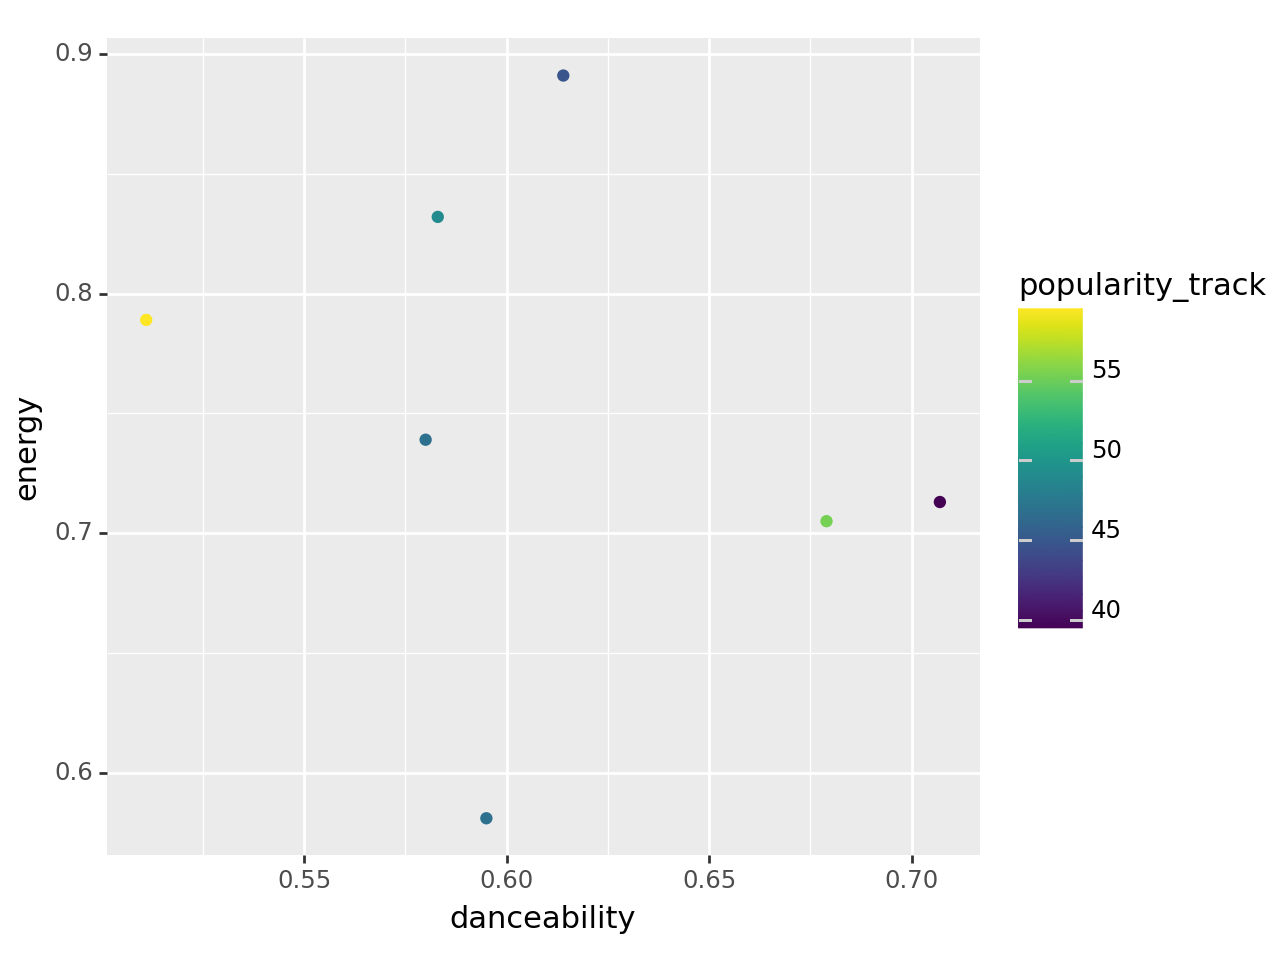

<Figure Size: (640 x 480)>

In [9]:
(
    ggplot(songs) +
    aes(x="danceability", y="energy", color="popularity_track") +
    plotnine.geom_point()
)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
(
    ggplot(songs.melt(id_vars=("track_name", "artist_name", "album_name", "name"))) +
    aes(x="variable", y="value") +
    plotnine.geom_violin() +
    plotnine.scale_y_log10() +
    plotnine.coord_flip()
)

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(song_metrics.corr(), annot=True, vmin=-1, vmax=1)
heatmap.set_title("Correlation heatmap", fontdict={"fontsize":12}, pad=12)
plt.show()

In [ ]:
g = sns.PairGrid(song_metrics)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

In [10]:
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import kmeans_plusplus, KMeans, DBSCAN



In [11]:
X = song_metrics.dropna()

pca = PCA()
pipe = Pipeline([("scaler", StandardScaler()), ("pca", pca)])
Xt = pipe.fit_transform(X)
dfx = pd.DataFrame(Xt)

dfx.shape


(7, 7)

In [ ]:
dfx.columns = ["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7"]#, "pc8", "pc9", "pc10", "pc11", "pc12", "pc13", "pc14", "pc15", "pc16"]

In [ ]:
fig = px.scatter_3d(dfx, x="pc1", y="pc2", z="pc3", color="pc4")
fig.show()

In [ ]:
(
    ggplot(dfx) +
    aes(x="pc1", y="pc2", color="pc3") +
    plotnine.geom_point()
)